In [ ]:
%pip install shap
%pip install keras
%pip install tensorflow
!pip install keras



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from ydata_profiling import ProfileReport
from sklearn.metrics import make_scorer
import shap
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

In [ ]:
df = pd.read_csv("C:/Users/manul/OneDrive/Escritorio/Manu/IE/Track  - Business Analytics/Machine learning/Cancer_Data.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.drop('Unnamed: 32', axis=1)

In [ ]:
# Assuming you have a DataFrame named 'df' with a column named 'status'
df['malignant'] = [1 if x == 'M' else 0 for x in df['diagnosis']]
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,malignant
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


In [ ]:
df = df.drop('diagnosis', axis=1)

In [ ]:
X = df.drop('malignant', axis=1)
y = df['malignant']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

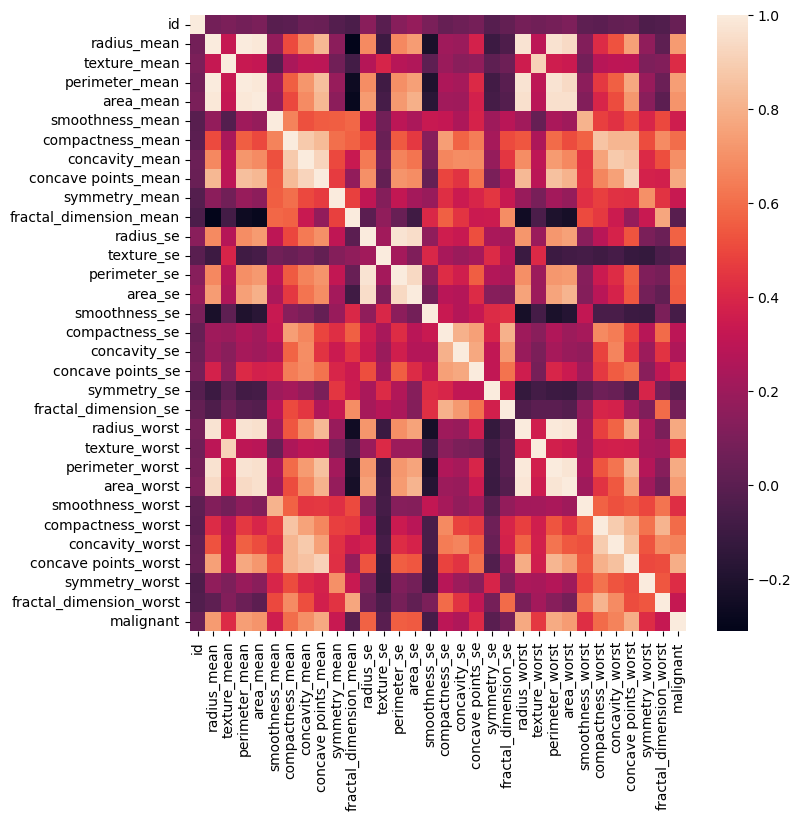

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the size as needed

# Plot the heatmap
sns.heatmap(corr_matrix, annot=False, ax=ax)

# Show the plot
plt.show()

### K fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


# Create a KFold object with the desired number of folds (k)
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)


### Defining a function to get scores for each model

In [ ]:
def get_scores(model_name, model_prediction):
    accuracy = accuracy_score(y_test, model_prediction)
    precision = precision_score(y_test, model_prediction)
    recall = recall_score(y_test, model_prediction)
    f1 = f1_score(y_test, model_prediction)

    print('The accuracy for model ', model_name, 'is: ', accuracy)
    print('The precision for model ', model_name, 'is: ', precision)
    print('The recall for model ', model_name, 'is: ', recall)
    print('The f1 for model ', model_name, 'is: ', f1)

# Logistic regression

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: feature scaling
    ('classifier', LogisticRegression())  # Logistic Regression model
])
lr_model = 'Logistic Regression'

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [ ]:
logreg_pred = pipeline.predict(X_test)

# LR Scores without Cross Validation

In [ ]:
get_scores(lr_model, logreg_pred)

The accuracy for model  Logistic Regression is:  0.9736842105263158
The precision for model  Logistic Regression is:  0.9761904761904762
The recall for model  Logistic Regression is:  0.9534883720930233
The f1 for model  Logistic Regression is:  0.9647058823529412


# LR Scores with Cross Validation

In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = a_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.9560439560439561
Fold 2 accuracy: 0.989010989010989
Fold 3 accuracy: 0.978021978021978
Fold 4 accuracy: 0.978021978021978
Fold 5 accuracy: 0.989010989010989
Mean accuracy: 0.9780219780219781


In [ ]:
# Perform cross-validation for precision
p_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='precision')

# Print the precision scores for each fold
for i, score in enumerate(p_scores):
    print(f"Fold {i+1} precision: {score}")

# Calculate and print the mean precision across all folds
mean_precision = p_scores.mean()
print("Mean precision:", mean_precision)

Fold 1 precision: 0.9444444444444444
Fold 2 precision: 0.9696969696969697
Fold 3 precision: 1.0
Fold 4 precision: 1.0
Fold 5 precision: 1.0
Mean precision: 0.9828282828282828


In [ ]:
# Perform cross-validation for recall
r_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')

# Print the precision scores for each fold
for i, score in enumerate(r_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean precision across all folds
mean_recall = r_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.9444444444444444
Fold 2 recall: 1.0
Fold 3 recall: 0.95
Fold 4 recall: 0.9354838709677419
Fold 5 recall: 0.9666666666666667
Mean recall: 0.9593189964157706


In [ ]:
# Perform cross-validation for F1
f1_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='f1')

# Print the precision scores for each fold
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} f1: {score}")

# Calculate and print the mean precision across all folds
mean_f1 = f1_scores.mean()
print("Mean F1:", mean_f1)

Fold 1 f1: 0.9444444444444444
Fold 2 f1: 0.9846153846153847
Fold 3 f1: 0.9743589743589743
Fold 4 f1: 0.9666666666666666
Fold 5 f1: 0.983050847457627
Mean F1: 0.9706272635086194


# Decision Tree Classifier

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: feature scaling
    ('classifier', DecisionTreeClassifier())  # Logistic Regression model
])
dt_model = 'Decision Tree Classifier'

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dt_predict = pipeline.predict(X_test)

# DT Scores without Cross Validation

In [ ]:
get_scores(dt_model, dt_predict)

The accuracy for model  Decision Tree Classifier is:  0.9385964912280702
The precision for model  Decision Tree Classifier is:  0.9090909090909091
The recall for model  Decision Tree Classifier is:  0.9302325581395349
The f1 for model  Decision Tree Classifier is:  0.9195402298850575


# DT Scores with Cross Validation

In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = a_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.9010989010989011
Fold 2 accuracy: 0.8461538461538461
Fold 3 accuracy: 0.8901098901098901
Fold 4 accuracy: 0.945054945054945
Fold 5 accuracy: 0.9230769230769231
Mean accuracy: 0.9010989010989011


In [ ]:
# Perform cross-validation for precision
p_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='precision')

# Print the precision scores for each fold
for i, score in enumerate(p_scores):
    print(f"Fold {i+1} precision: {score}")

# Calculate and print the mean precision across all folds
mean_precision = p_scores.mean()
print("Mean precision:", mean_precision)

Fold 1 precision: 0.8095238095238095
Fold 2 precision: 0.7368421052631579
Fold 3 precision: 0.875
Fold 4 precision: 0.8666666666666667
Fold 5 precision: 0.8888888888888888
Mean precision: 0.8353842940685045


In [ ]:
# Perform cross-validation for recall
r_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')

# Print the precision scores for each fold
for i, score in enumerate(r_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean precision across all folds
mean_recall = r_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.9166666666666666
Fold 2 recall: 0.875
Fold 3 recall: 0.875
Fold 4 recall: 0.9032258064516129
Fold 5 recall: 0.8
Mean recall: 0.873978494623656


In [ ]:
# Perform cross-validation for F1
f1_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='f1')

# Print the precision scores for each fold
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} f1: {score}")

# Calculate and print the mean precision across all folds
mean_f1 = f1_scores.mean()
print("Mean F1:", mean_f1)

Fold 1 f1: 0.8717948717948718
Fold 2 f1: 0.8115942028985507
Fold 3 f1: 0.9268292682926829
Fold 4 f1: 0.9152542372881356
Fold 5 f1: 0.896551724137931
Mean F1: 0.8844048608824344


# Random Forest Classifier

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: feature scaling
    ('classifier', RandomForestClassifier())  # Logistic Regression model
])
rf_model = "Random Forest Classifier"

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rf_predict = pipeline.predict(X_test)

# RF scores without cross validation

In [ ]:
get_scores(rf_model, rf_predict)

The accuracy for model  Random Forest Classifier is:  0.9649122807017544
The precision for model  Random Forest Classifier is:  0.975609756097561
The recall for model  Random Forest Classifier is:  0.9302325581395349
The f1 for model  Random Forest Classifier is:  0.9523809523809524


# RF scores with cross validation

In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = a_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.967032967032967
Fold 2 accuracy: 0.967032967032967
Fold 3 accuracy: 0.978021978021978
Fold 4 accuracy: 0.9340659340659341
Fold 5 accuracy: 0.9230769230769231
Mean accuracy: 0.9538461538461538


In [ ]:
# Perform cross-validation for precision
p_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='precision')

# Print the precision scores for each fold
for i, score in enumerate(p_scores):
    print(f"Fold {i+1} precision: {score}")

# Calculate and print the mean precision across all folds
mean_precision = p_scores.mean()
print("Mean precision:", mean_precision)

Fold 1 precision: 0.9714285714285714
Fold 2 precision: 0.9393939393939394
Fold 3 precision: 1.0
Fold 4 precision: 0.9
Fold 5 precision: 0.9259259259259259
Mean precision: 0.9473496873496874


In [ ]:
# Perform cross-validation for recall
r_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')

# Print the precision scores for each fold
for i, score in enumerate(r_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean precision across all folds
mean_recall = r_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.9444444444444444
Fold 2 recall: 0.96875
Fold 3 recall: 1.0
Fold 4 recall: 0.8064516129032258
Fold 5 recall: 0.8333333333333334
Mean recall: 0.9105958781362007


In [ ]:
# Perform cross-validation for F1
f1_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='f1')

# Print the precision scores for each fold
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} f1: {score}")

# Calculate and print the mean precision across all folds
mean_f1 = f1_scores.mean()
print("Mean F1:", mean_f1)

Fold 1 f1: 0.9428571428571428
Fold 2 f1: 0.9538461538461539
Fold 3 f1: 0.975609756097561
Fold 4 f1: 0.8813559322033899
Fold 5 f1: 0.8771929824561403
Mean F1: 0.9261723934920776


# Gradient Boosted Trees model

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: feature scaling
    ('classifier', GradientBoostingClassifier())  # Logistic Regression model
])
gbt_model = "Gradient Boosted Trees"

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', GradientBoostingClassifier())])

In [ ]:
gbt_predict = pipeline.predict(X_test)

# GBT scores without cross validation

In [ ]:
get_scores(gbt_model, gbt_predict)

The accuracy for model  Gradient Boosted Trees is:  0.9473684210526315
The precision for model  Gradient Boosted Trees is:  0.9302325581395349
The recall for model  Gradient Boosted Trees is:  0.9302325581395349
The f1 for model  Gradient Boosted Trees is:  0.9302325581395349


# GBT scores with cross validation

In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = a_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.9560439560439561
Fold 2 accuracy: 0.9560439560439561
Fold 3 accuracy: 0.9230769230769231
Fold 4 accuracy: 0.945054945054945
Fold 5 accuracy: 0.9120879120879121
Mean accuracy: 0.9384615384615385


In [ ]:
# Perform cross-validation for precision
p_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='precision')

# Print the precision scores for each fold
for i, score in enumerate(p_scores):
    print(f"Fold {i+1} precision: {score}")

# Calculate and print the mean precision across all folds
mean_precision = p_scores.mean()
print("Mean precision:", mean_precision)

Fold 1 precision: 0.9444444444444444
Fold 2 precision: 0.9375
Fold 3 precision: 0.9024390243902439
Fold 4 precision: 1.0
Fold 5 precision: 0.9230769230769231
Mean precision: 0.9414920783823224


In [ ]:
# Perform cross-validation for recall
r_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')

# Print the precision scores for each fold
for i, score in enumerate(r_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean precision across all folds
mean_recall = r_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.9444444444444444
Fold 2 recall: 0.9375
Fold 3 recall: 0.95
Fold 4 recall: 0.8387096774193549
Fold 5 recall: 0.8333333333333334
Mean recall: 0.9007974910394265


In [ ]:
# Perform cross-validation for F1
f1_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='f1')

# Print the precision scores for each fold
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} f1: {score}")

# Calculate and print the mean precision across all folds
mean_f1 = f1_scores.mean()
print("Mean F1:", mean_f1)

Fold 1 f1: 0.9444444444444444
Fold 2 f1: 0.9375
Fold 3 f1: 0.925
Fold 4 f1: 0.9122807017543859
Fold 5 f1: 0.8571428571428571
Mean F1: 0.9152736006683375


## Extreme Gradient Boosted trees

In [ ]:
xgb = xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_predict = xgb.predict(X_test)

In [ ]:
xgb_model = 'Extreme Gradient Boosted trees'

# XGB Scores without cross validation

In [ ]:
get_scores(xgb_model, xgb_predict)

The accuracy for model  Extreme Gradient Boosted trees is:  0.956140350877193
The precision for model  Extreme Gradient Boosted trees is:  0.9523809523809523
The recall for model  Extreme Gradient Boosted trees is:  0.9302325581395349
The f1 for model  Extreme Gradient Boosted trees is:  0.9411764705882352


# XGB Scores with cross validation

In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = a_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.9560439560439561
Fold 2 accuracy: 0.978021978021978
Fold 3 accuracy: 0.9560439560439561
Fold 4 accuracy: 0.978021978021978
Fold 5 accuracy: 0.9230769230769231
Mean accuracy: 0.9582417582417582


In [ ]:
# Perform cross-validation for precision
p_scores = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='precision')

# Print the precision scores for each fold
for i, score in enumerate(p_scores):
    print(f"Fold {i+1} precision: {score}")

# Calculate and print the mean precision across all folds
mean_precision = p_scores.mean()
print("Mean precision:", mean_precision)

Fold 1 precision: 0.9444444444444444
Fold 2 precision: 0.96875
Fold 3 precision: 0.9736842105263158
Fold 4 precision: 1.0
Fold 5 precision: 0.9259259259259259
Mean precision: 0.9625609161793373


In [ ]:
# Perform cross-validation for recall
r_scores = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='recall')

# Print the precision scores for each fold
for i, score in enumerate(r_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean precision across all folds
mean_recall = r_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.9444444444444444
Fold 2 recall: 0.96875
Fold 3 recall: 0.925
Fold 4 recall: 0.9354838709677419
Fold 5 recall: 0.8333333333333334
Mean recall: 0.9214023297491039


In [ ]:
# Perform cross-validation for F1
f1_scores = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='f1')

# Print the precision scores for each fold
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} f1: {score}")

# Calculate and print the mean precision across all folds
mean_f1 = f1_scores.mean()
print("Mean F1:", mean_f1)

Fold 1 f1: 0.9444444444444444
Fold 2 f1: 0.96875
Fold 3 f1: 0.9487179487179489
Fold 4 f1: 0.9666666666666666
Fold 5 f1: 0.8771929824561403
Mean F1: 0.9411544084570401


# Support Vector Machine

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: feature scaling
    ('classifier', SVC())
])
svm_model = "Support Vector Machine"

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [ ]:
svm_predict = pipeline.predict(X_test)


# SVM scores without cross validation

In [ ]:
get_scores(svm_model, svm_predict)

The accuracy for model  Support Vector Machine is:  0.9824561403508771
The precision for model  Support Vector Machine is:  1.0
The recall for model  Support Vector Machine is:  0.9534883720930233
The f1 for model  Support Vector Machine is:  0.9761904761904763


# SVM scores with cross validation

In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = a_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.9560439560439561
Fold 2 accuracy: 0.978021978021978
Fold 3 accuracy: 0.978021978021978
Fold 4 accuracy: 0.989010989010989
Fold 5 accuracy: 0.967032967032967
Mean accuracy: 0.9736263736263735


In [ ]:
# Perform cross-validation for precision
p_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='precision')

# Print the precision scores for each fold
for i, score in enumerate(p_scores):
    print(f"Fold {i+1} precision: {score}")

# Calculate and print the mean precision across all folds
mean_precision = p_scores.mean()
print("Mean precision:", mean_precision)

Fold 1 precision: 0.9444444444444444
Fold 2 precision: 0.96875
Fold 3 precision: 0.975
Fold 4 precision: 1.0
Fold 5 precision: 0.9655172413793104
Mean precision: 0.970742337164751


In [ ]:
# Perform cross-validation for recall
r_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')

# Print the precision scores for each fold
for i, score in enumerate(r_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean precision across all folds
mean_recall = r_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.9444444444444444
Fold 2 recall: 0.96875
Fold 3 recall: 0.975
Fold 4 recall: 0.967741935483871
Fold 5 recall: 0.9333333333333333
Mean recall: 0.9578539426523298


In [ ]:
# Perform cross-validation for F1
f1_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='f1')

# Print the precision scores for each fold
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} f1: {score}")

# Calculate and print the mean precision across all folds
mean_f1 = f1_scores.mean()
print("Mean F1:", mean_f1)

Fold 1 f1: 0.9444444444444444
Fold 2 f1: 0.96875
Fold 3 f1: 0.975
Fold 4 f1: 0.9836065573770492
Fold 5 f1: 0.9491525423728815
Mean F1: 0.964190708838875


# K Nearest Neighbours

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: feature scaling
    ('classifier', KNeighborsClassifier())
])
knn_model = "K Nearest Neighbours"

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
knn_predict = pipeline.predict(X_test)

# KNN scores without cross validation

In [ ]:
get_scores(knn_model, knn_predict)

The accuracy for model  K Nearest Neighbours is:  0.9473684210526315
The precision for model  K Nearest Neighbours is:  0.9302325581395349
The recall for model  K Nearest Neighbours is:  0.9302325581395349
The f1 for model  K Nearest Neighbours is:  0.9302325581395349


# KNN Scores with cross validation

In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = a_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.967032967032967
Fold 2 accuracy: 0.989010989010989
Fold 3 accuracy: 0.967032967032967
Fold 4 accuracy: 0.9340659340659341
Fold 5 accuracy: 0.9560439560439561
Mean accuracy: 0.9626373626373628


In [ ]:
# Perform cross-validation for precision
p_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='precision')

# Print the precision scores for each fold
for i, score in enumerate(p_scores):
    print(f"Fold {i+1} precision: {score}")

# Calculate and print the mean precision across all folds
mean_precision = p_scores.mean()
print("Mean precision:", mean_precision)

Fold 1 precision: 1.0
Fold 2 precision: 1.0
Fold 3 precision: 1.0
Fold 4 precision: 0.9310344827586207
Fold 5 precision: 1.0
Mean precision: 0.9862068965517242


In [ ]:
# Perform cross-validation for recall
r_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')

# Print the precision scores for each fold
for i, score in enumerate(r_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean precision across all folds
mean_recall = r_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.9166666666666666
Fold 2 recall: 0.96875
Fold 3 recall: 0.925
Fold 4 recall: 0.8709677419354839
Fold 5 recall: 0.8666666666666667
Mean recall: 0.9096102150537636


In [ ]:
# Perform cross-validation for F1
f1_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='f1')

# Print the precision scores for each fold
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} f1: {score}")

# Calculate and print the mean precision across all folds
mean_f1 = f1_scores.mean()
print("Mean F1:", mean_f1)

Fold 1 f1: 0.9565217391304348
Fold 2 f1: 0.9841269841269841
Fold 3 f1: 0.961038961038961
Fold 4 f1: 0.9
Fold 5 f1: 0.9285714285714286
Mean F1: 0.9460518225735617


# Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(64,64), activation='relu', random_state=42)
nn_model = "Neural Network"

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64), random_state=42)

In [ ]:
nn_predict = nn.predict(X_test_scaled)

# NN scores without cross validation

In [ ]:
get_scores(nn_model, nn_predict)

The accuracy for model  Neural Network is:  0.9736842105263158
The precision for model  Neural Network is:  0.9761904761904762
The recall for model  Neural Network is:  0.9534883720930233
The f1 for model  Neural Network is:  0.9647058823529412


# NN scores with cross validation

In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(nn, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = a_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.967032967032967
Fold 2 accuracy: 0.989010989010989
Fold 3 accuracy: 0.978021978021978
Fold 4 accuracy: 0.989010989010989
Fold 5 accuracy: 1.0
Mean accuracy: 0.9846153846153847


In [ ]:
# Define the scoring method
scorer = make_scorer(precision_score, zero_division=1)

# Perform cross-validation for precision
p_scores = cross_val_score(nn, X_train, y_train, cv=kfold, scoring=scorer)

# Print the precision scores for each fold
for i, score in enumerate(p_scores):
    print(f"Fold {i+1} precision: {score}")

# Calculate and print the mean precision across all folds
mean_precision = p_scores.mean()
print("Mean precision:", mean_precision)

Fold 1 precision: 0.6666666666666666
Fold 2 precision: 1.0
Fold 3 precision: 0.43956043956043955
Fold 4 precision: 0.34065934065934067
Fold 5 precision: 0.32967032967032966
Mean precision: 0.5553113553113553


In [ ]:
# Perform cross-validation for recall
r_scores = cross_val_score(nn, X_train, y_train, cv=kfold, scoring='recall')

# Print the precision scores for each fold
for i, score in enumerate(r_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean precision across all folds
mean_recall = r_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.05555555555555555
Fold 2 recall: 0.0
Fold 3 recall: 1.0
Fold 4 recall: 1.0
Fold 5 recall: 1.0
Mean recall: 0.611111111111111


In [ ]:
# Perform cross-validation for F1
f1_scores = cross_val_score(nn, X_train, y_train, cv=kfold, scoring='f1')

# Print the precision scores for each fold
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} f1: {score}")

# Calculate and print the mean precision across all folds
mean_f1 = f1_scores.mean()
print("Mean F1:", mean_f1)

Fold 1 f1: 0.10256410256410256
Fold 2 f1: 0.0
Fold 3 f1: 0.6106870229007634
Fold 4 f1: 0.5081967213114754
Fold 5 f1: 0.49586776859504134
Mean F1: 0.34346312307427657


# Hyperparameter tuning

## Logistic Regression

In [ ]:
logreg = LogisticRegression()

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'sag']
}

In [ ]:
grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='recall')
grid_search_lr.fit(X_train_scaled, y_train)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge

40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ujjawaljain/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ujjawaljain/anaconda3/lib/python3.10/site-packages/sklearn/linea

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag']},
             scoring='recall')

In [ ]:
best_params_lr = grid_search_lr.best_params_
print("Best hyperparameters:", best_params_lr)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
best_model_lr = grid_search_lr.best_estimator_

In [ ]:
lr_ht_predict = best_model_lr.predict(X_test_scaled)

In [ ]:
lr_opt_recall = recall_score(y_test, lr_ht_predict, average='weighted')
lr_opt_f1 = f1_score(y_test, lr_ht_predict, average = 'weighted')
print("The recall score for this model is: ", lr_opt_recall)
print("The f1 score for this model is: ", lr_opt_f1)

The recall score for this model is:  0.9736842105263158
The f1 score for this model is:  0.973742132293316


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_true' is the true target values and 'y_pred' is the predicted values from the logistic regression model

# Calculate the confusion matrix
cm_lr_ht = confusion_matrix(y_test, lr_ht_predict)

# Print the confusion matrix
print(cm_lr_ht)

[[69  2]
 [ 1 42]]


## Decision Trees

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
param_grid_dt = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
                }

In [ ]:
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='recall')
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [ ]:
best_params_dt = grid_search_dt.best_params_
print("Best hyperparameters:", best_params_dt)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_model_dt = grid_search_dt.best_estimator_

In [ ]:
dt_ht_predict = best_model_dt.predict(X_test_scaled)

In [ ]:
dt_opt_recall = recall_score(y_test, dt_ht_predict, average='weighted')
print("The recall score for this model is: ", dt_opt_recall)
dt_opt_f1 = f1_score(y_test, dt_ht_predict, average = 'weighted')
print("The f1 score for this model is: ", dt_opt_f1)


The recall score for this model is:  0.9473684210526315
The f1 score for this model is:  0.947107351712615


## Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [ ]:
best_params_rf = grid_search_rf.best_params_
print("Best hyperparameters:", best_params_rf)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
best_model_rf = grid_search_rf.best_estimator_

In [ ]:
rf_ht_predict = best_model_rf.predict(X_test_scaled)

In [ ]:
rf_opt_recall = recall_score(y_test, rf_ht_predict, average='weighted')
print("The recall score for this model is: ", rf_opt_recall)
rf_opt_f1 = f1_score(y_test, rf_ht_predict, average='weighted')
print("The f1 score for this model is: ", rf_opt_f1)

The recall score for this model is:  0.9649122807017544
The f1 score for this model is:  0.9647382344750767


## Gradient Boosted Trees

In [ ]:
gbt = GradientBoostingClassifier()

In [ ]:
param_grid_gbt = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
}

In [ ]:
grid_search_gbt = GridSearchCV(gbt, param_grid_gbt, cv=5, scoring='recall')
grid_search_gbt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [ ]:
best_params_gbt = grid_search_gbt.best_params_
print("Best hyperparameters:", best_params_gbt)

Best hyperparameters: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 300}


In [ ]:
best_model_gbt = grid_search_gbt.best_estimator_

In [ ]:
gbt_ht_predict = best_model_gbt.predict(X_test_scaled)

In [ ]:
gbt_opt_recall = recall_score(y_test, gbt_ht_predict, average='weighted')
print("The recall score for this model is: ", gbt_opt_recall)
gbt_opt_f1 = f1_score(y_test, gbt_ht_predict, average='weighted')
print("The f1 score for this model is: ", gbt_opt_f1)

The recall score for this model is:  0.9473684210526315
The f1 score for this model is:  0.9473684210526315


## Extreme Gradient Boosted trees

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
}

In [ ]:
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='recall')
grid_search_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
print("Best hyperparameters:", best_params_xgb)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
best_model_xgb = grid_search_xgb.best_estimator_

In [ ]:
xgb_ht_predict = best_model_xgb.predict(X_test_scaled)

In [ ]:
xgb_opt_recall = recall_score(y_test, xgb_ht_predict, average='weighted')
print("The recall score for this model is: ", xgb_opt_recall)
xgb_opt_f1 = f1_score(y_test, xgb_ht_predict, average='weighted')
print("The f1 score for this model is: ", xgb_opt_f1)

The recall score for this model is:  0.9649122807017544
The f1 score for this model is:  0.9647382344750767


## Support Vector Machine

In [ ]:
svm = SVC()

In [ ]:
param_grid_svm = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

In [ ]:
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='recall')
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='recall')

In [ ]:
best_params_svm = grid_search_svm.best_params_
print("Best hyperparameters:", best_params_svm)

Best hyperparameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
best_model_svm = grid_search_svm.best_estimator_

In [ ]:
svm_ht_predict = best_model_svm.predict(X_test_scaled)

In [ ]:
svm_opt_recall = recall_score(y_test, svm_ht_predict, average='weighted')
svm_opt_f1 = f1_score(y_test, svm_ht_predict, average = 'weighted')
print("The recall score for this model is: ", svm_opt_recall)
print("The f1 score for this model is: ", svm_opt_f1)

The recall score for this model is:  0.9736842105263158
The f1 score for this model is:  0.9736214250146138


## K-nearest neighbours

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}


In [ ]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
best_params_knn = grid_search_knn.best_params_
print("Best hyperparameters:", best_params_knn)

Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [ ]:
best_model_knn = grid_search_knn.best_estimator_

In [ ]:
knn_ht_predict = best_model_knn.predict(X_test_scaled)

In [ ]:
knn_opt_recall = recall_score(y_test, knn_ht_predict, average='weighted')
print("The recall score for this model is: ", knn_opt_recall)
knn_opt_f1 = f1_score(y_test, knn_ht_predict, average='weighted')
print("The f1 score for this model is: ", knn_opt_f1)

The recall score for this model is:  0.9649122807017544
The f1 score for this model is:  0.9649122807017544


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'keras.wrappers'

# Permutation feature invariance

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

In [ ]:
final_model = LogisticRegression(C=1, penalty='l1', solver='liblinear')
final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
result = permutation_importance(final_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
stds = result.importances_std

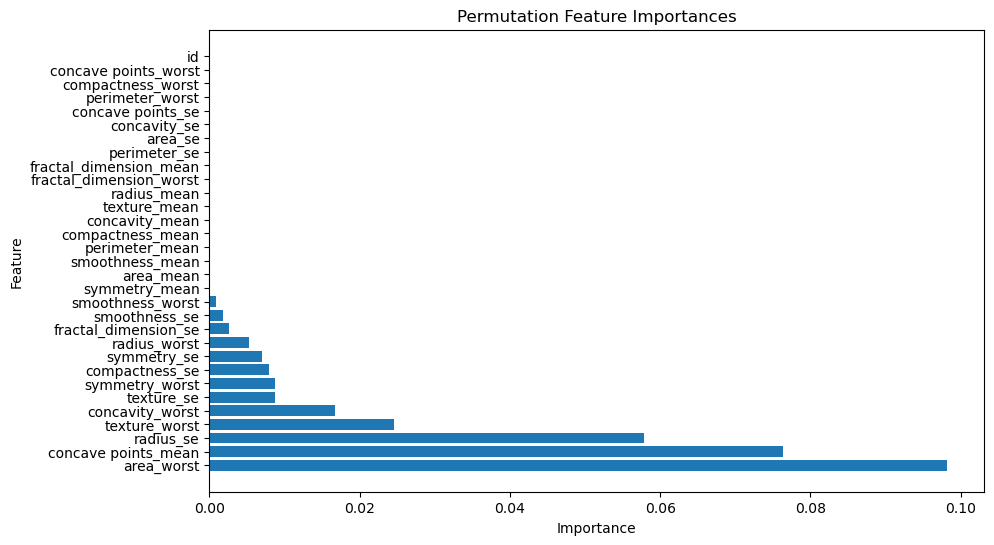

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'importances' is the array of feature importances obtained from permutation_importance

# Sort the importances and corresponding feature names in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importances')
plt.show()


# Feature explainability with SHAP

In [ ]:
shap_lr = LogisticRegression(C=1, penalty='l1', solver='liblinear')
shap_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
explainer = shap.KernelExplainer(shap_lr.predict_proba, X_train_scaled)


Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X_test_scaled)

  0%|          | 0/114 [00:00<?, ?it/s]

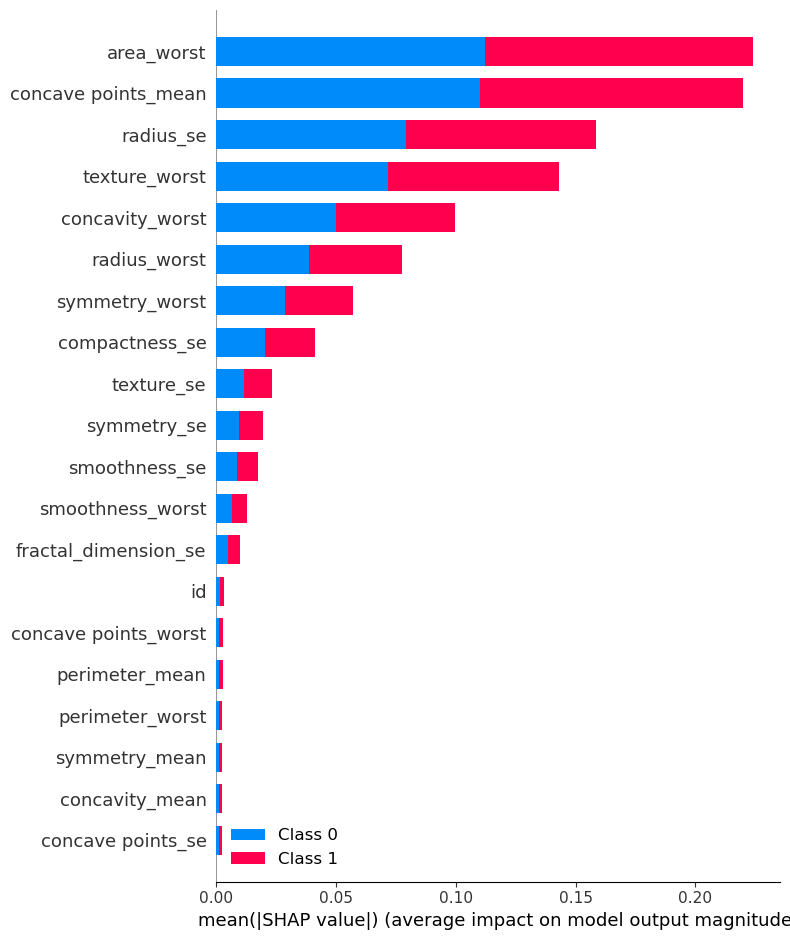

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Feature engineering

In [ ]:
X_eng = df[['area_worst','concave points_mean','radius_se', 'texture_worst','concavity_worst','radius_worst','symmetry_worst',
            'compactness_se', 'texture_se','symmetry_se','smoothness_se','smoothness_worst','fractal_dimension_se']]
y_eng = df['malignant']

In [ ]:
X_eng_train, X_eng_test, y_eng_train, y_eng_test = train_test_split(X_eng, y_eng, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

#We fit the scaler
scaler.fit(X_eng_train)

# We scale the X training subset
X_eng_train_scaled = scaler.transform(X_eng_train)

# We scale the X test subset
X_eng_test_scaled = scaler.transform(X_eng_test)

In [ ]:
fe_logreg = LogisticRegression(C=1, penalty='l1', solver='liblinear')
fitted_fe_logreg = fe_logreg.fit(X_eng_train_scaled, y_eng_train)

In [ ]:
fe_logreg_predict = fe_logreg.predict(X_eng_test_scaled)
model_logreg_fe = 'Feature Engineered Logistic Regression'

In [ ]:
get_scores(model_logreg_fe, fe_logreg_predict)

The accuracy for model  Feature Engineered Logistic Regression is:  0.9736842105263158
The precision for model  Feature Engineered Logistic Regression is:  0.9545454545454546
The recall for model  Feature Engineered Logistic Regression is:  0.9767441860465116
The f1 for model  Feature Engineered Logistic Regression is:  0.9655172413793104


In [ ]:
# Perform cross-validation for accuracy
a_scores = cross_val_score(fe_logreg, X_eng_train_scaled, y_eng_train, cv=kfold, scoring='recall')

# Print the accuracy scores for each fold
for i, score in enumerate(a_scores):
    print(f"Fold {i+1} recall: {score}")

# Calculate and print the mean accuracy across all folds
mean_recall = a_scores.mean()
print("Mean recall:", mean_recall)

Fold 1 recall: 0.9444444444444444
Fold 2 recall: 1.0
Fold 3 recall: 0.95
Fold 4 recall: 0.9032258064516129
Fold 5 recall: 0.9666666666666667
Mean recall: 0.9528673835125447


In [ ]:
coefficients = fe_logreg.coef_[0]

In [ ]:
for feature, coefficient in zip(X_eng.columns, coefficients):
    print(f"{feature}: {coefficient}")

area_worst: 3.114199183281083
concave points_mean: 2.423264947740859
radius_se: 2.4664487026336994
texture_worst: 1.8572690924467177
concavity_worst: 1.3029332095198227
radius_worst: 0.7896042878327288
symmetry_worst: 1.018758708764466
compactness_se: -0.8963437337038266
texture_se: -0.38717099434215935
symmetry_se: -0.4561798428115806
smoothness_se: 0.4339350017926156
smoothness_worst: 0.16763744577649772
fractal_dimension_se: -0.2779835581487741


In [ ]:
odds_ratio = np.exp(coefficients)


# Create a DataFrame to display the results
result_df = pd.DataFrame({'Feature': X_eng.columns, 'Coefficient': coefficients, 'Odds Ratio': odds_ratio})
print(result_df)

                 Feature  Coefficient  Odds Ratio
0             area_worst     3.114199   22.515392
1    concave points_mean     2.423265   11.282636
2              radius_se     2.466449   11.780536
3          texture_worst     1.857269    6.406218
4        concavity_worst     1.302933    3.680075
5           radius_worst     0.789604    2.202525
6         symmetry_worst     1.018759    2.769755
7         compactness_se    -0.896344    0.408059
8             texture_se    -0.387171    0.678975
9            symmetry_se    -0.456180    0.633700
10         smoothness_se     0.433935    1.543319
11      smoothness_worst     0.167637    1.182508
12  fractal_dimension_se    -0.277984    0.757309


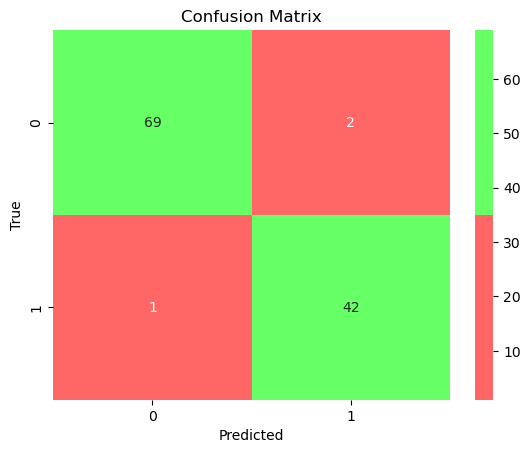

In [ ]:
from sklearn.metrics import confusion_matrix
cm_fe_ht_lr = confusion_matrix(y_eng_test, fe_logreg_predict)

cmap = sns.color_palette(["#FF6666", "#66FF66"])

sns.heatmap(cm_fe_ht_lr, annot=True, fmt="d", cmap=cmap)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

# Cost matrix

In [ ]:
actuals = ['Benign', 'Malignant']
benigns = [0,1000]
malignants = [100,0]

cost_matrix = pd.DataFrame({'Benign predictions' : benigns, 'Malignant predictions' : malignants})

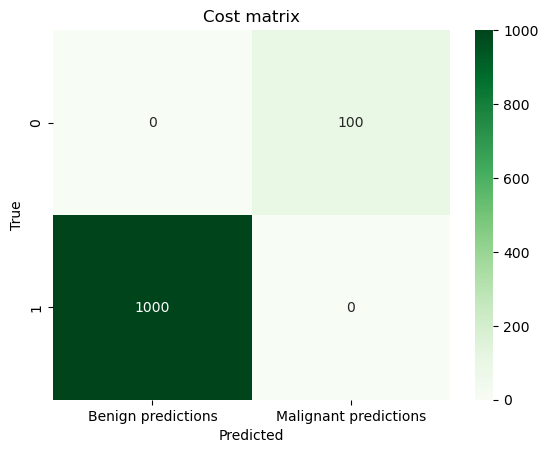

In [ ]:
sns.heatmap(cost_matrix, annot=True, fmt="d", cmap="Greens")

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Cost matrix")

# Show the plot
plt.show()

In [ ]:
cost_of_model_opt = cm_fe_ht_lr[0][1] * malignants[0] + cm_fe_ht_lr[1][0]*benigns[1]
print('The cost of our model is $', cost_of_model_opt)

The cost of our model is $ 1200


# Cost of baseline model

In [ ]:
logreg = LogisticRegression()
logreg_model = "Logistic Regression"

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logreg_predict = logreg.predict(X_test)

In [ ]:
get_scores(logreg_model, logreg_predict)

The accuracy for model  Logistic Regression is:  0.9736842105263158
The precision for model  Logistic Regression is:  0.9761904761904762
The recall for model  Logistic Regression is:  0.9534883720930233
The f1 for model  Logistic Regression is:  0.9647058823529412


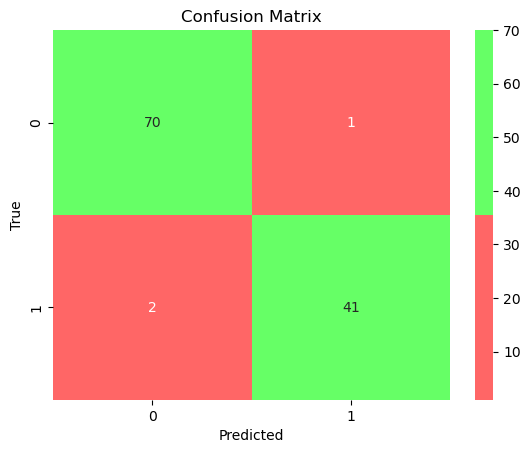

In [ ]:
cm_logreg_base = confusion_matrix(y_test, logreg_predict)

cmap = sns.color_palette(["#FF6666", "#66FF66"])

sns.heatmap(cm_logreg_base, annot=True, fmt="d", cmap=cmap)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [ ]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

In [ ]:
cost_of_model_base = cm_logreg_base[0][1] * malignants[0] + cm_logreg_base[1][0]*benigns[1]
print('The cost of our model is $', cost_of_model_opt)
print('The cost of the baseline model is $' , cost_of_model_base)
print('The cost differential between models is of : $', cost_of_model_base - cost_of_model_opt)

The cost of our model is $ 1200
The cost of the baseline model is $ 2100
The cost differential between models is of : $ 900


# Annex